In [6]:
pip install statsmodels


     ---------------------------------------- 9.2/9.2 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 KB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip cache purge


Files removed: 297
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install openpyxl

     ------------------------------------ 250.0/250.0 KB 613.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
# importing necessery libraries
import numpy as np
import pandas as pd  
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import lag_plot

In [10]:
df = pd.read_excel("global_semiconductor_sales.xlsx", names=['date',"sales_in_billion"])

In [13]:
df.head()

,,,,date,sales_in_billion
Jan '12,23.16,May '13,24.69,Sep '14,29.23
Feb '12,22.95,Jun '13,24.88,Oct '14,29.68
Mar '12,23.28,Jul '13,25.53,Nov '14,29.77
Apr '12,24.06,Aug '13,26.1,Dec '14,29.13
May '12,24.4,Sep '13,26.85,Jan '15,28.55


In [4]:
df.describe()

,sales_in_billion
count,120.000000
mean,32.222500
std,6.727372
min,22.950000
25%,26.800000
50%,30.765000
75%,36.910000
max,50.850000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              120 non-null    object 
 1   sales_in_billion  120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


Changing Format of Dates (from ) and setting it as Index

In [6]:
df.set_index(pd.to_datetime(df.date.apply(
    lambda x: x[:3] + "-" + x[-2:]), format="%b-%y"), inplace=True)
df.drop('date', axis=1, inplace=True)


In [7]:
df

,sales_in_billion
date,
2012-01-01,23.16
2012-02-01,22.95
2012-03-01,23.28
2012-04-01,24.06
2012-05-01,24.40
...,...
2021-08-01,47.32
2021-09-01,48.48
2021-10-01,48.79


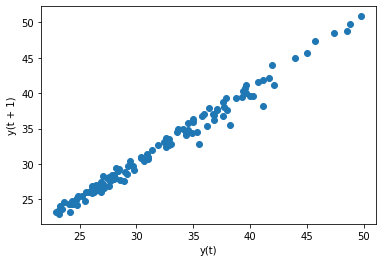

In [8]:
# Ploting lag plot to understand the time series
from pandas.plotting import lag_plot
lag_plot(df['sales_in_billion'])

* Given the lag plot to be linear an autoregressive model is a better choice 
* No outliers 
* No Randomness



### Auto Correlation Plot

In [9]:
from pandas.plotting import autocorrelation_plot

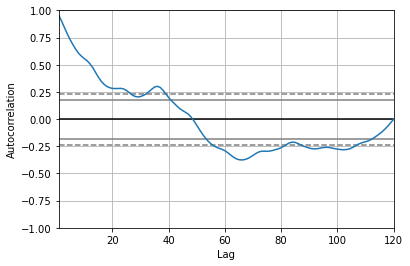

In [10]:
autocorrelation_plot(df.sales_in_billion)

### Decomposing Time Series

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
 result_a = seasonal_decompose(temp_df['Sales'],model='multiplicative')
 result_a.plot()

NameError: name 'temp_df' is not defined

### Train Test split

In [ ]:
temp_df = df.copy(deep=True)

In [ ]:
temp_df= temp_df[(temp_df.index <'2019-12-01')]

In [ ]:
temp_df.tail()

,Sales
dates,
2019-07-01,33.55
2019-08-01,34.53
2019-09-01,35.79
2019-10-01,36.84
2019-11-01,36.85


In [ ]:
train_size = int(temp_df.shape[0]*0.7)
train_size

66

In [ ]:
train = temp_df[0:train_size]

In [ ]:
test = temp_df[train_size:]

In [ ]:
train.shape

(66, 1)

In [ ]:
test.shape

(29, 1)

In [ ]:
temp_df.tail()

,Sales
dates,
2019-07-01,33.55
2019-08-01,34.53
2019-09-01,35.79
2019-10-01,36.84
2019-11-01,36.85


## SARIMAX (Seasonal Autoregrresive Intergrated Moving Average)

In [ ]:
model = SARIMAX(temp_df['Sales'],order=(2,2,5),seasonal_order=(1,1,1,12))

C:\Users\mayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
model_fit=model.fit()

C:\Users\mayan\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [ ]:
residuals = model_fit.resid

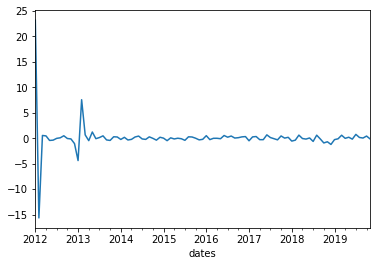

In [ ]:
residuals.plot()

In [ ]:
output = model_fit.forecast()

In [ ]:
t = model_fit.forecast(25)

NameError: name 'model_fit' is not defined

In [ ]:
series= temp_df['Sales'].squeeze()

In [ ]:
temp_df.drop('Month',axis=1,inplace=True)

In [ ]:
t

2019-12-01    35.971354
2020-01-01    34.658683
2020-02-01    33.337611
2020-03-01    33.231791
2020-04-01    33.195748
2020-05-01    33.711240
2020-06-01    33.796021
2020-07-01    34.070411
2020-08-01    34.859035
2020-09-01    35.650272
2020-10-01    36.198875
2020-11-01    35.853360
2020-12-01    34.457929
2021-01-01    32.856962
2021-02-01    31.213643
2021-03-01    31.027996
2021-04-01    30.878548
2021-05-01    31.287531
2021-06-01    31.249215
2021-07-01    31.518536
2021-08-01    32.229766
2021-09-01    32.998744
2021-10-01    33.555029
2021-11-01    33.174700
2021-12-01    31.758985
Freq: MS, dtype: float64

In [ ]:
pd.concat()

In [ ]:
tdf = pd.DataFrame(t, columns=["Sales"])

In [ ]:
tdf

,Sales
2019-12-01,35.971354
2020-01-01,34.658683
2020-02-01,33.337611
2020-03-01,33.231791
2020-04-01,33.195748
2020-05-01,33.711240
2020-06-01,33.796021
2020-07-01,34.070411
2020-08-01,34.859035
2020-09-01,35.650272


In [ ]:
new= pd.concat([temp_df,tdf])

In [ ]:
from matplotlib import pyplot

In [ ]:
df.drop('Month',inplace=True,axis=1)

In [ ]:
new

,Sales
2012-01-01,23.160000
2012-02-01,22.950000
2012-03-01,23.280000
2012-04-01,24.060000
2012-05-01,24.400000
...,...
2021-08-01,32.229766
2021-09-01,32.998744
2021-10-01,33.555029
2021-11-01,33.174700


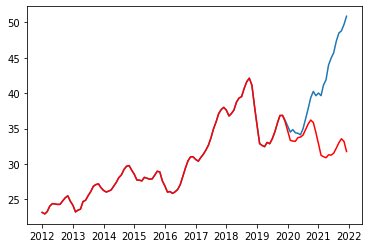

In [ ]:
pyplot.plot(df)
pyplot.plot(new,color='red')

In [ ]:
mse = mean_squared_error(new,df)
mse

NameError: name 'mean_squared_error' is not defined